# Week 3: Clustering


In this workshop, we will work through a set of problems clustering, another cannonical form of unsupervised learning. Clustering is an important tool that is used to discover homogeneous groups of data points within a heterogeneous population. It can be the main goal in some problems, while in others it may be used in EDA to understand the main types of behavior in the data or in feature engineering.   

We will start by generating some artificial data, and then we will utilize clustering algorithms described in lectures and explore the impact of feature engineering on the solution. We will then attempt to find clusters in a gene expression dataset. 

As usual, the worksheets will be completed in teams of 2-3, using **pair programming**, and we have provided cues to switch roles between driver and navigator. When completing worksheets:

>- You will have tasks tagged by (CORE) and (EXTRA). 
>- Your primary aim is to complete the (CORE) components during the WS session, afterwards you can try to complete the (EXTRA) tasks for your self-learning process. 
>- Look for the 🏁 as cue to switch roles between driver and navigator.

Instructions for submitting your workshops can be found at the end of worksheet. As a reminder, you must submit a pdf of your notebook on Learn by 16:00 PM on the Friday of the week the workshop was given. 

As you work through the problems it will help to refer to your lecture notes (navigator). The exercises here are designed to reinforce the topics covered this week. Please discuss with the tutors if you get stuck, even early on! 

## Outline

1. [Problem Definition and Setup: Simulated Example](#setup1)
2. [K-means: Simulated Example](#kmeans1)
3. [Hierarchical Clustering: Simulated Example](#hc)
4. [Gene Expression Data](#genedata)
5. [Hierarchical Clustering: Gene Expression Data](#hc_genedata)
6. [K-means Clustering: Gene Expression Data](#kmeans_genedata)

# Problem Definition and Setup: Simulated Example <a id='setup1'></a>

## Packages

First, lets load in some packages to get us started. 

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

## Data: Simulated Example

We will begin with a simple simulated example in which there are truly three clusters. We assume that there are $D=2$ features and within each cluster, the data points are generated from a spherical normal distribution $N(\mathbf{m}_k, \sigma^2_k \mathbf{I})$ for clusters $k=1,2,3$, where both the mean $\mathbf{m}_k$ and variance $\sigma^2_k$ are different across clusters. Specifically, we assume that: 

* Cluster 1: contains $|C_1|=500$ points with mean vector $\mathbf{m}_1 = \begin{pmatrix} 0 \\ 4 \end{pmatrix}$ with standard deviation $\sigma_1 = 2$.
* Cluster 2: contains $|C_2|=250$ points with mean vector $\mathbf{m}_2 = \begin{pmatrix} 0 \\ -4 \end{pmatrix}$ with standard deviation $\sigma_2 = 1$.
* Cluster 3: contains $|C_3|=100$ points with mean vector $\mathbf{m}_3 = \begin{pmatrix} -4 \\ 0 \end{pmatrix}$ with standard deviation $\sigma_3 = 0.5$.

### 🚩 Exercise 1 (CORE)

Generate the dataset described above and store it in array called `X`.

Visualise your data and color by the true cluster labels.

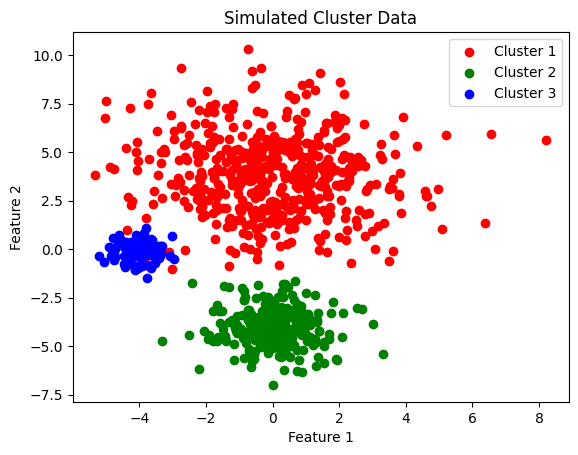

In [80]:
means = [np.array([0, 4]), np.array([0, -4]), np.array([-4, 0])]
std_devs = [2, 1, 0.5]
sizes = [500, 250, 100]

clusters = [np.random.multivariate_normal(mean, (std_dev ** 2) * np.identity(2), size)
            for mean, std_dev, size in zip(means, std_devs, sizes)]

X = np.vstack(clusters)

colors = ['red', 'green', 'blue']
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f'Cluster {i + 1}')

plt.title('Simulated Cluster Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# K-means Clustering: Simulated Example <a id='kmeans1'></a>

To perform K-means clustering, we will use `KMeans()` in `sklearn.cluster`. Documentation is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), and for an overview of clustering methods available in `sklearn`, see [link](https://scikit-learn.org/stable/modules/clustering.html). There are different inputs we can specify when calling `KMeans()` such as:

- `n_clusters`: the number of clusters. 
- `init`: which specifies the intialization of the centroids, e.g. can be set to `k-means++` for K-means++ initialization or `random` for random initialization.
- `n_init`: which specifies the number of times the algorithm is run with different random initializations
- `random_state`: this can bet set to a fixed number to make results reproducible.

We can then use the `.fit()` method of `KMeans` to run the K-means algorithm on our data.

After fitting, some of the relevant attributes of interest include:

- `labels_`: cluster assignments of the data points.
- `cluster_centers_`: mean corresponding to each cluster, stored in a matrix of size: number of clusters $K$ times number features $D$.
- `inertia_`: the total within-cluster variation.

### 🚩 Exercise 2 (CORE)

Let's start by exploring how the clustering changes across the K-means iterations. To do, set:

- number of clusters to 3
- initialization to random
- number of times the algorithm is run to 1
- fix the random seed to a number of your choice (e.g. 2)


a) Now, fit the K-means algorithms with different values of the maximum number of iterations fixed to 1,2,3, and the default value of 300. 

b) Plot the clustering solution for the four different cases and comment on how it changes. 

c) How many iterations are needed for the convergence?

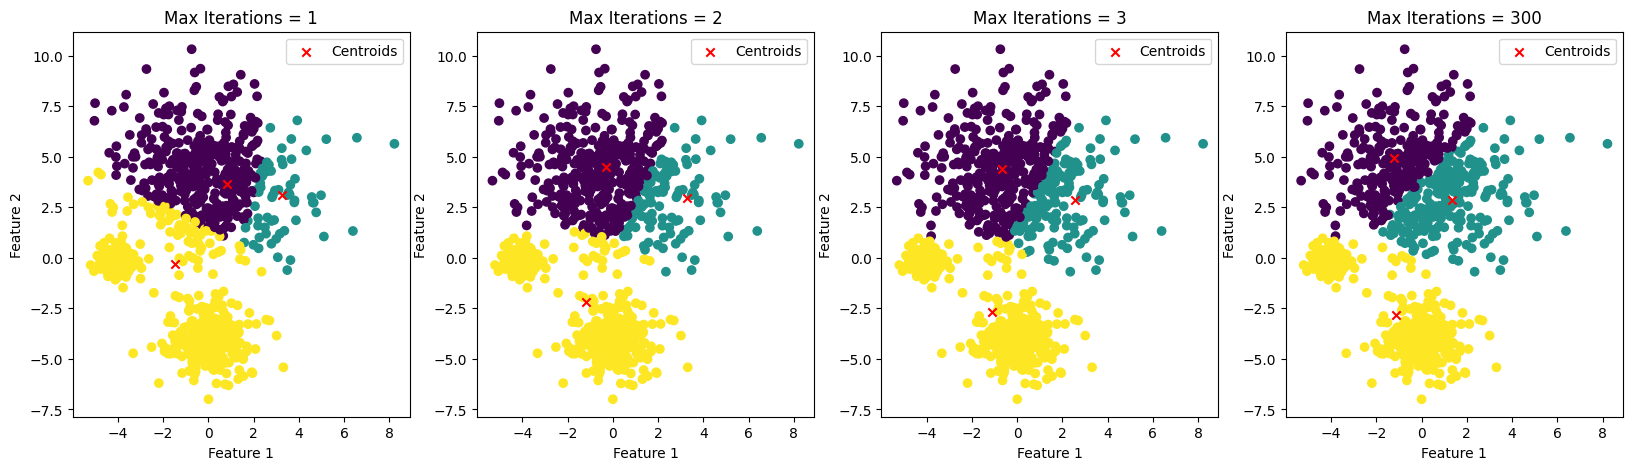

In [81]:
# Part a, Part b
np.random.seed(2)

n_clusters = 3

max_iters = [1, 2, 3, 300]

fig, axs = plt.subplots(1, len(max_iters), figsize=(20, 5))

for i, max_iter in enumerate(max_iters):
    kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=1, max_iter=max_iter, random_state=2)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    axs[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
    axs[i].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')
    axs[i].set_title(f'Max Iterations = {max_iter}')
    axs[i].set_xlabel('Feature 1')
    axs[i].set_ylabel('Feature 2')
    axs[i].legend()

plt.show()

In [82]:
# Part c
kmeans_default = KMeans(n_clusters=n_clusters, init='random', n_init=1, random_state=2)
kmeans_default.fit(X)
iterations_to_converge = kmeans_default.n_iter_

print(f"Number of iterations for convergence: {iterations_to_converge}")

Number of iterations for convergence: 10


### 🚩 Exercise 3 (CORE)

Next, compare the random intialization with K-means++ (in this case fix the number of different initializations to 10). Plot both clustering solutions. Which requires fewer iterations? and which provides a lower within-cluster variation?

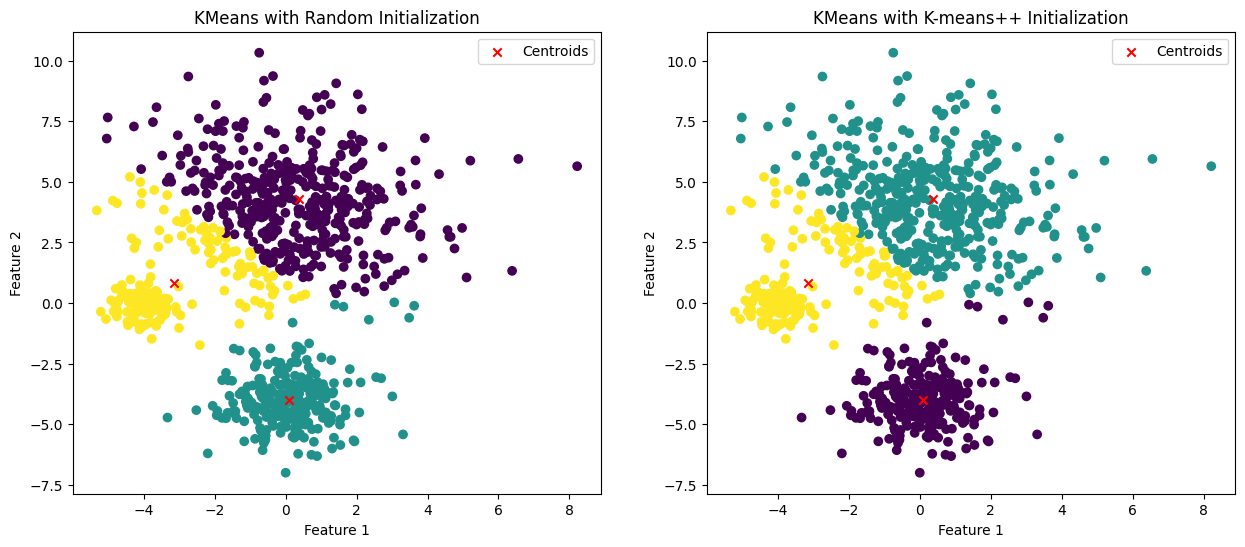

In [83]:
kmeans_rand = KMeans(n_clusters=n_clusters, init='random', n_init=10, random_state=3)
kmeans_rand.fit(X)
labels_rand = kmeans_rand.labels_
centroids_rand = kmeans_rand.cluster_centers_

kmeans_pp = KMeans(n_clusters=n_clusters, n_init=10, random_state=3)
kmeans_pp.fit(X)
labels_pp = kmeans_pp.labels_
centroids_pp = kmeans_pp.cluster_centers_

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].scatter(X[:, 0], X[:, 1], c=labels_rand, cmap='viridis', marker='o')
axs[0].scatter(centroids_rand[:, 0], centroids_rand[:, 1], c='red', marker='x', label='Centroids')
axs[0].set_title('KMeans with Random Initialization')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
axs[0].legend()

axs[1].scatter(X[:, 0], X[:, 1], c=labels_pp, cmap='viridis', marker='o')
axs[1].scatter(centroids_pp[:, 0], centroids_pp[:, 1], c='red', marker='x', label='Centroids')
axs[1].set_title('KMeans with K-means++ Initialization')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')
axs[1].legend()

plt.show()

In [84]:
kmeans_rand.n_iter_

9

In [85]:
kmeans_pp.n_iter_

8

In [86]:
kmeans_rand.inertia_

4076.494818673263

In [87]:
kmeans_pp.inertia_

4076.494818673263

### 🚩 Exercise 4 (CORE)

Find the clustering solution using a different number of initializations equal to 1, 2, 5, 10, and 20. Visualize and comment on the results. Try changing the random state; how does that change your conclusions?

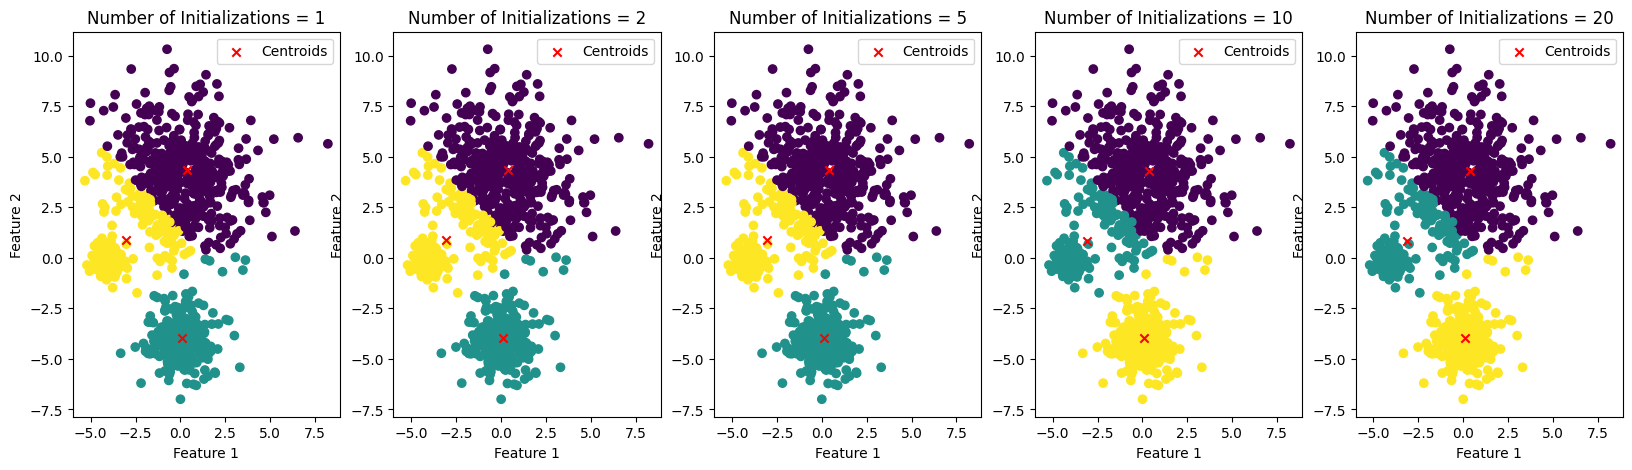

In [88]:
inits = [1, 2, 5, 10, 20]

fig, axs = plt.subplots(1, len(inits), figsize=(20, 5))

for i, init in enumerate(inits):
    kmeans = KMeans(n_clusters=n_clusters, n_init=init, random_state=2)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    axs[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
    axs[i].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')
    axs[i].set_title(f'Number of Initializations = {init}')
    axs[i].set_xlabel('Feature 1')
    axs[i].set_ylabel('Feature 2')
    axs[i].legend()

The number of initializations don't seem to really effect the efficiency of the algorithm since the clustering is done efficiently using the K-Means++ algorithm which is the default for this scikit-learn function.

🏁 **Now, is a good point to switch driver and navigator**

### 🚩 Exercise 5 (CORE)

Since we simulated the data, we know the true number of clusters. However, in practice this number is rarely known. Find the K-means solution with different choices of $K$ and plot the within-cluster variation as a function of $K$. Comment on the results.

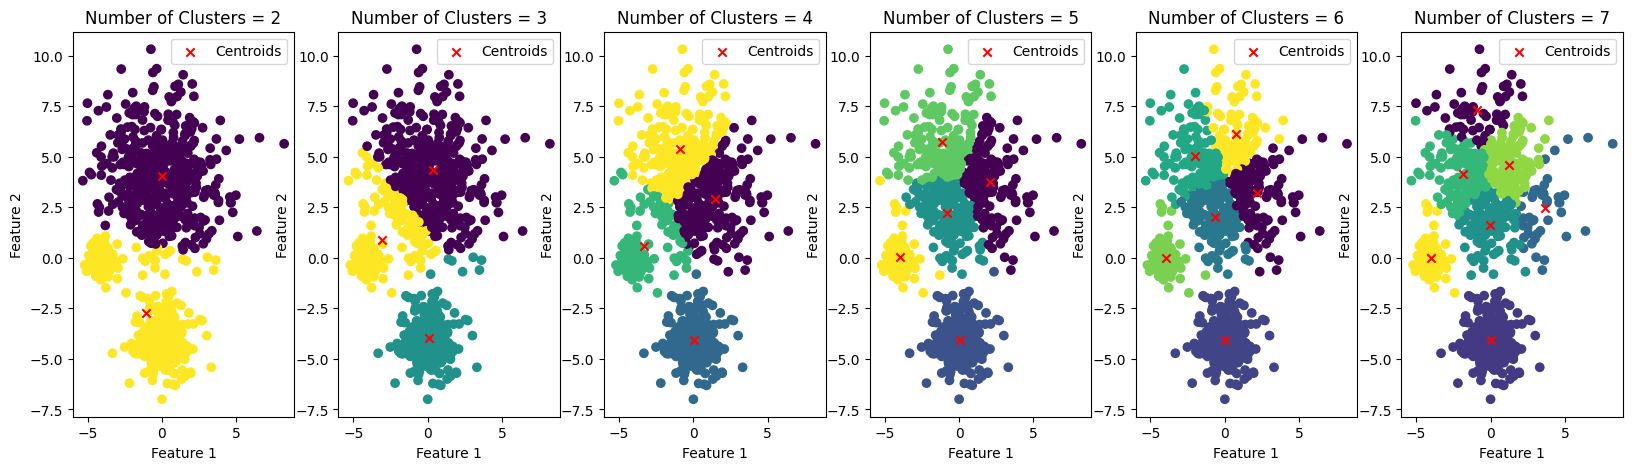

In [89]:
K_values = range(2, 8)
WCSS = []

fig, axs = plt.subplots(1, len(K_values), figsize=(20, 5))

for i, K in enumerate(K_values):
    kmeans = KMeans(n_clusters=K, n_init=3, random_state=2)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    axs[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
    axs[i].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')
    axs[i].set_title(f'Number of Clusters = {K}')
    axs[i].set_xlabel('Feature 1')
    axs[i].set_ylabel('Feature 2')
    axs[i].legend()

    WCSS.append(kmeans.inertia_)

plt.show()

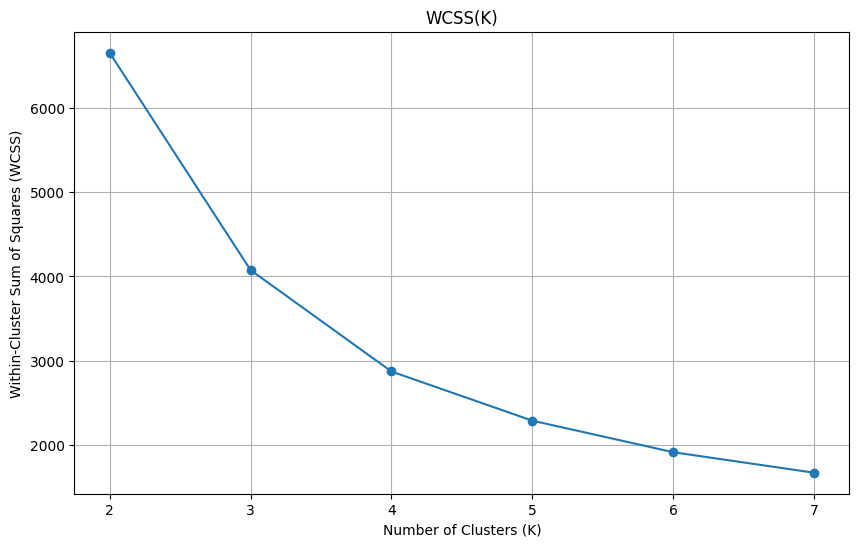

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(K_values, WCSS, marker='o')
plt.title('WCSS(K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(K_values)
plt.grid(True)
plt.show()

There doesn't seem to be a real elbow but the most prominent slope change is seen for $K = 3$ clusters, this can be explained by the fabricated nature of the data.

### 🚩 Exercise 6 (CORE)

Now standardize the data and re-run the K-means algorithm. Qualitatively, how has standardising the data impacted performance? Can you argue why you observe what you see?

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

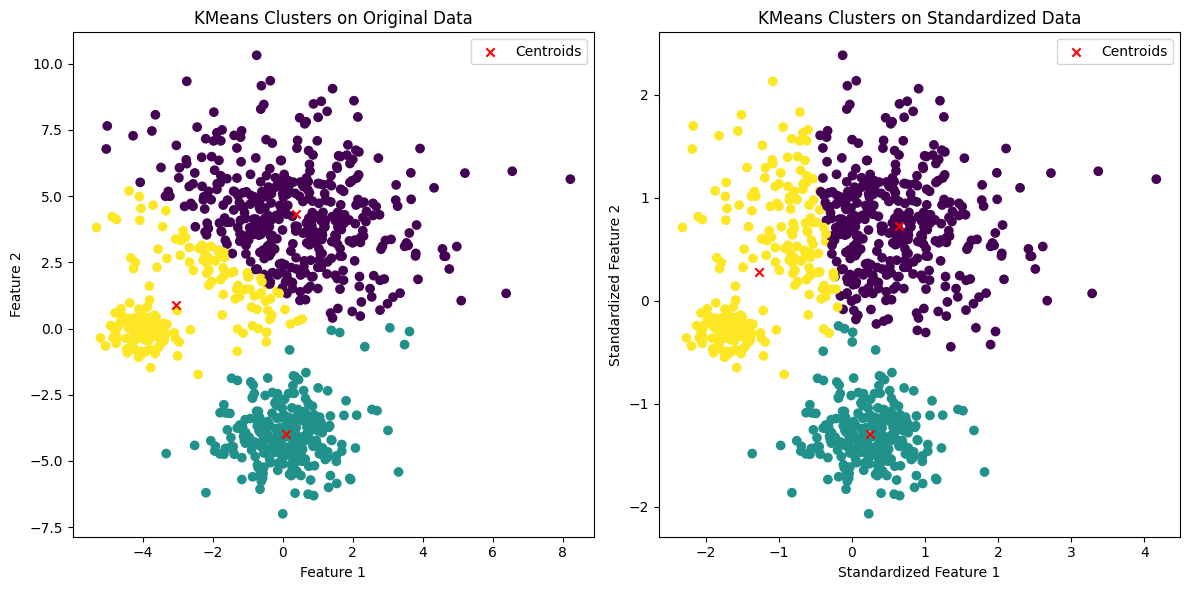

In [92]:
kmeans_original = KMeans(n_clusters=3, n_init="auto", random_state=2)
clusters_original = kmeans_original.fit_predict(X)

kmeans_standardized = KMeans(n_clusters=3, n_init="auto", random_state=2)
clusters_standardized = kmeans_standardized.fit_predict(X_standardized)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(X[:, 0], X[:, 1], c=clusters_original, cmap='viridis', marker='o')
ax[0].scatter(kmeans_original.cluster_centers_[:, 0], kmeans_original.cluster_centers_[:, 1], c='red', marker='x',
              label='Centroids')
ax[0].set_title('KMeans Clusters on Original Data')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].legend()

ax[1].scatter(X_standardized[:, 0], X_standardized[:, 1], c=clusters_standardized, cmap='viridis', marker='o')
ax[1].scatter(kmeans_standardized.cluster_centers_[:, 0], kmeans_standardized.cluster_centers_[:, 1], c='red',
              marker='x', label='Centroids')
ax[1].set_title('KMeans Clusters on Standardized Data')
ax[1].set_xlabel('Standardized Feature 1')
ax[1].set_ylabel('Standardized Feature 2')
ax[1].legend()

plt.tight_layout()
plt.show()

In [93]:
print(f'Iterations it took to converge for original data: {kmeans_original.n_iter_}')
print(f'Iterations it took to converge for standardized data: {kmeans_standardized.n_iter_}')

Iterations it took to converge for original data: 10
Iterations it took to converge for standardized data: 9


In [94]:
print(f'WCSS for original data: {kmeans_original.inertia_}')
print(f'WCSS for standardized data: {kmeans_standardized.inertia_}')

WCSS for original data: 4076.70283388003
WCSS for standardized data: 517.6592254416622


The original data took 10 iterations to converge, while the standardized data took 9. This suggests that standardization potentially led to a slightly more efficient convergence. The difference in iteration count is minimal, indicating that both datasets have similar complexity in terms of clustering, but standardization may have made the data slightly more amenable to partitioning by K-means.

The WCSS for the original data is substantially higher (4076.7) compared to the standardized data (517.7). This significant decrease in WCSS after standardization indicates that the clusters in the standardized data are more compact and better defined. Standardization likely enhanced the separation between clusters, making it easier for K-means to form tighter and more distinct groups.

# Hierarchical Clustering: Simulated Example <a id='hc'></a>

To perform hierarchical clustering, we will use the [`linkage()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function from `scipy.cluster.hierarchy`. The inputs to specify include

-  the data. 
- `metric`: specifies the dissimarlity between data points. Defaults to the Euclidean distance.
- `method`: specifies the type of linkage, e.g. complete, single, or average.

Then, we can use [`dendrogram()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) from `scipy.cluster.hierarchy` to plot the dendrogram.

### 🚩 Exercise 7 (CORE)

a) Use hierarchical clustering with complete linkage to cluster the simulated data.

In [95]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt

hc_comp = linkage(X, method='complete', metric='euclidean')

b) Plot the dendogram by running the code below. Try changing the 'color_threshold' to a number (e.g. 11) to color the branches of the tree below the threshold with different colors, thus, identifying the clusters if the tree were to be cut at that threshold.

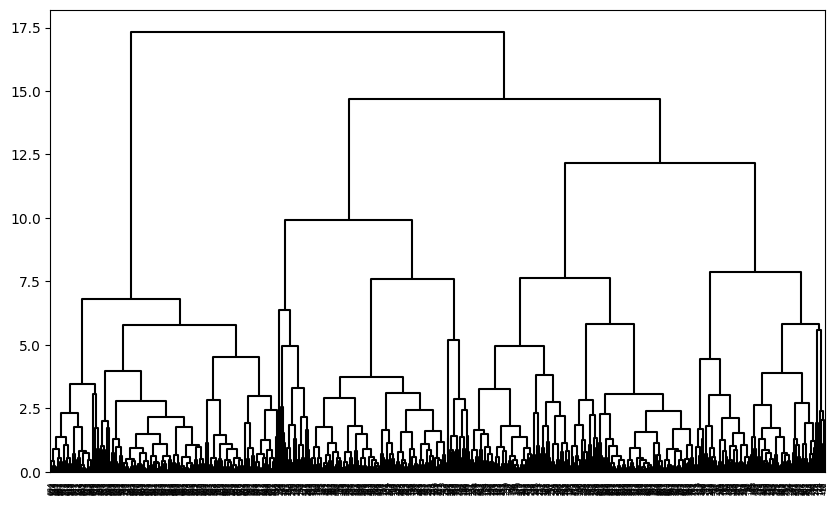

In [96]:
cargs = {'color_threshold': -np.inf, 'above_threshold_color': 'black'}
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
dendrogram(hc_comp, ax=ax, **cargs)
plt.show()

c) Now, use the function `cut_tree()` from `scipy.cluster.hierarchy` to determine the cluster labels associated with a given cut of the dendrogram. You can either specify the number of clusters via `n_clusters` or the height/threshold at which to cut via `height`. Plot the data colored by cluster membership.

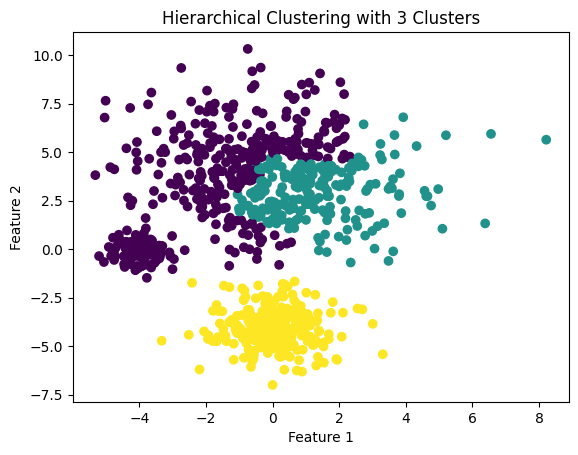

In [97]:
n_clusters = 3
cluster_labels = cut_tree(hc_comp, n_clusters=n_clusters).flatten()

plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title(f'Hierarchical Clustering with {n_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### 🚩 Exercise 8 (CORE)

Now try changing the linkage to single and average. Does this affect on the results?

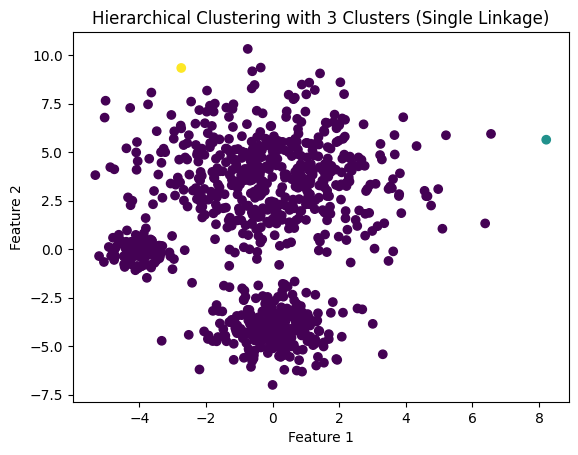

In [98]:
linkage_matrix_single = linkage(X, method='single', metric='euclidean')

cluster_labels_single = cut_tree(linkage_matrix_single, n_clusters=n_clusters).flatten()

plt.scatter(X[:, 0], X[:, 1], c=cluster_labels_single, cmap='viridis', marker='o')
plt.title(f'Hierarchical Clustering with {n_clusters} Clusters (Single Linkage)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

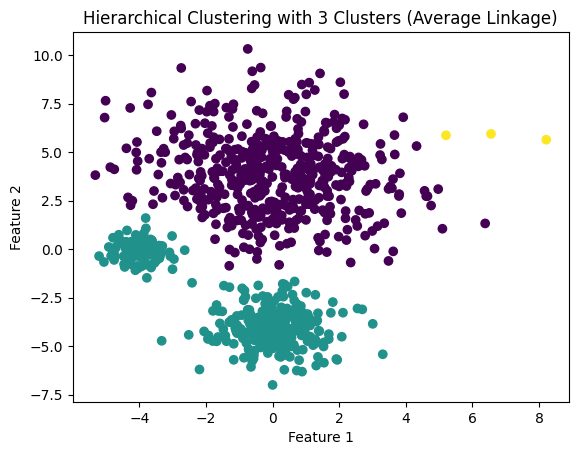

In [99]:
linkage_matrix_average = linkage(X, method='average', metric='euclidean')

cluster_labels_average = cut_tree(linkage_matrix_average, n_clusters=n_clusters).flatten()

plt.scatter(X[:, 0], X[:, 1], c=cluster_labels_average, cmap='viridis', marker='o')
plt.title(f'Hierarchical Clustering with {n_clusters} Clusters (Average Linkage)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Both single and average linkage yield much worse results compared to **complete linkage**, out of the two single linkage completely underpeforms and groups everything but two datapoints into a single cluster to achieve 3 clusters.

🏁 **Now, is a good point to switch driver and navigator**

# Gene Expression Data <a id='genedata'></a>

Now, we will consider a more complex real dataset with a larger feature space. 

The dataset is the **NCI cancer microarray dataset** discussed in both *Introduction to Statistical Learning* and  *Elements of Statistical Learning*. The dataset consists of $D=6830$ gene expression measurements for each of $N=64$ cancer cell lines. The aim is to determine whether there are groups among the cell lines based on their gene expressions. This is an example of a high-dimensional dataset with $D$ much larger than $N$, which makes visualization difficult. The $N=64$ cancer cell lines have been obtained from samples of cancerous tisses, corresponding to 14 different types of cancer. However, our focus remains unsupervised learning and we will use the cancer labels only to plot. 

We first need to read in the dataset.

In [100]:
#Fetch the data and cancer labels
url_data = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/nci.data.csv'
url_labels = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/nci.label.txt'

X = pd.read_csv(url_data)
y = pd.read_csv(url_labels, header=None)

# clean data and follow convention in the notes that features are columns:
X = X.drop(labels='Unnamed: 0', axis=1).T

In [101]:
X.shape

(64, 6830)

In [102]:
y.shape

(64, 1)

Let's visualise the data with a contour plot.

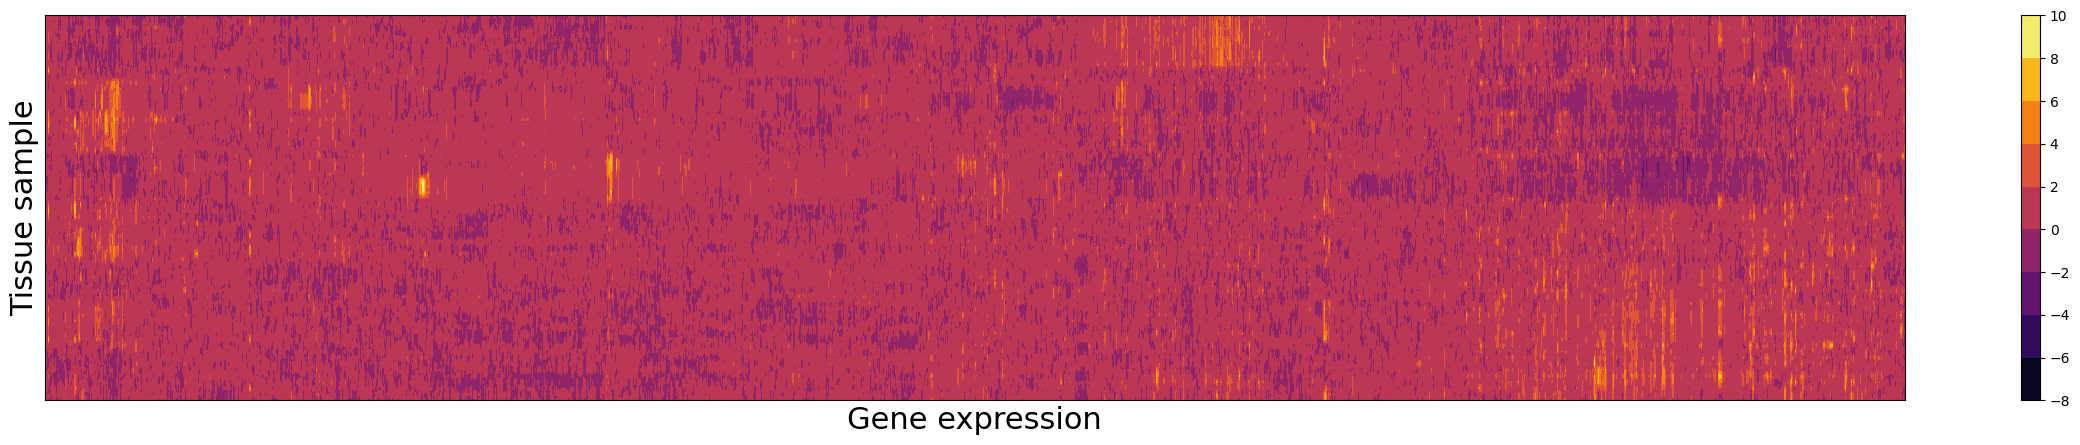

In [103]:
fig = plt.figure(figsize=(30, 5))
ax = fig.add_subplot(111)
contours = ax.contourf(X, cmap='inferno')  #, vmax=4, vmin=-4)
cbar = plt.colorbar(contours)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Gene expression", fontsize=22)
ax.set_ylabel("Tissue sample", fontsize=22)
plt.show()

We now convert our pandas dataframe into a numpy array and create integer labels for cancer type (for plotting purposes)

If you visualise the labels, you will notice there are lots of inconsistencies with white space etc. Run the following code to clean the labels.

In [104]:
y.value_counts()

RENAL                         4
OVARIAN                       4
MELANOMA                      3
NSCLC                         3
COLON                         3
BREAST                        2
NSCLC                         2
MELANOMA                      2
NSCLC                         2
LEUKEMIA                      2
PROSTATE                      2
COLON                         2
CNS                           2
CNS                           2
BREAST                        2
RENAL                         2
MELANOMA                      2
RENAL                         1
RENAL                         1
OVARIAN                       1
OVARIAN                       1
NSCLC                         1
NSCLC                         1
RENAL                         1
MCF7D-repro                   1
MELANOMA                      1
BREAST                        1
MCF7A-repro                   1
LEUKEMIA                      1
LEUKEMIA                      1
LEUKEMIA                      1
LEUKEMIA

In [105]:
y_clean = np.asarray(y).flatten()
for j in range(y_clean.size):
    y_clean[j] = y_clean[j].strip()
np.unique(y_clean, return_counts=True)
cancer_types = list(np.unique(y_clean))
cancer_groups = np.array([cancer_types.index(lab) for lab in y_clean])

In [106]:
X_array = np.asarray(X)

### 🚩 Exercise 9 (EXTRA)

Perform a PCA of $\mathbf X$ to visualize the data. Plot the first few principal component scores and color by cancer type. Do cell lines within the same cancer types seems to have similar scores? Make a scree plot of the proportion of variance explained. How many components does this suggest?

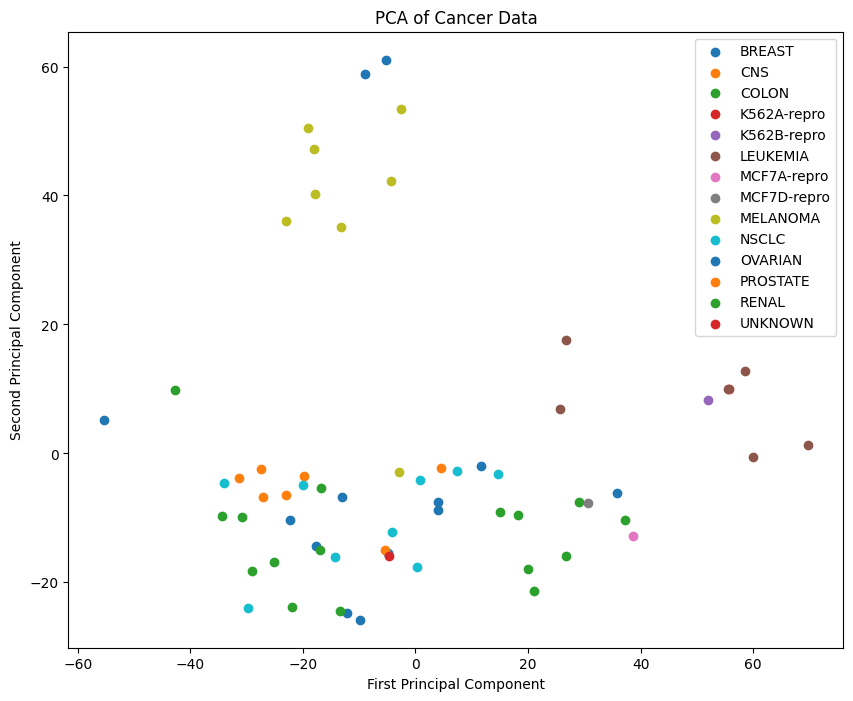

In [107]:
from sklearn.decomposition import PCA

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_array)

# Performing PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plotting the first two principal components
plt.figure(figsize=(10, 8))
for i, cancer_type in enumerate(cancer_types):
    plt.scatter(X_pca[cancer_groups == i, 0], X_pca[cancer_groups == i, 1], label=cancer_type)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Cancer Data')
plt.legend()
plt.show()

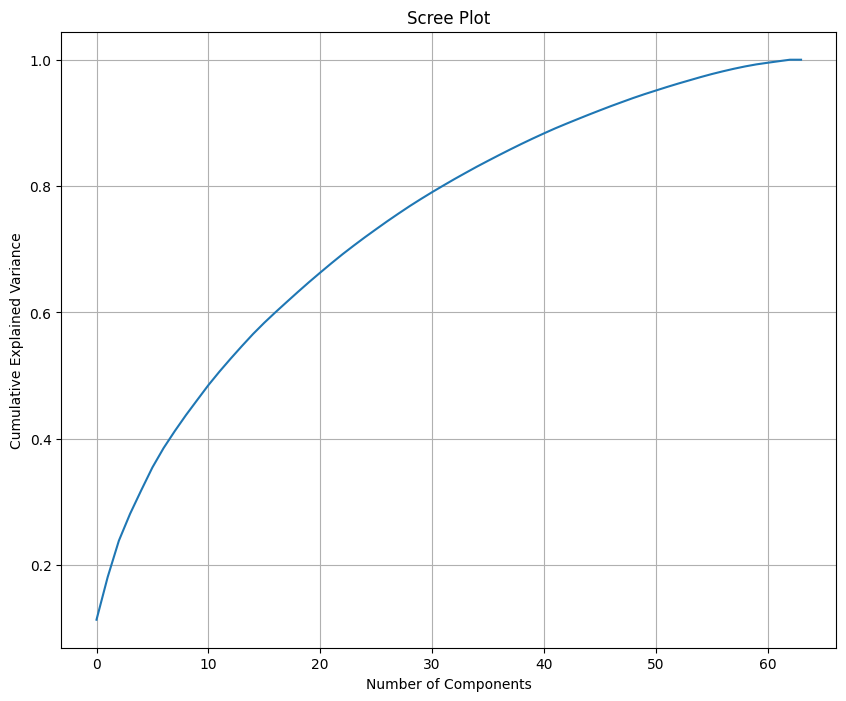

In [108]:
plt.figure(figsize=(10, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

Initially, the first few principal components contribute a significant amount of new information, hence the steeper slope at the start of the plot. As more components are added, each new component contributes less and less to the explained variance. This gradual reduction in the slope of the curve indicates that subsequent components are capturing less variance in the data.

# Hierarchical Clustering: Gene Expression Data <a id='hc_genedata'></a>

Now, let's perform hierarchical clustering on the gene expression data. 

### 🚩 Exercise 10 (CORE)

a) Plot the dendrogram with complete, single, and average linkage. Does the choice of linkage affect the results? Which linkage would you choose?

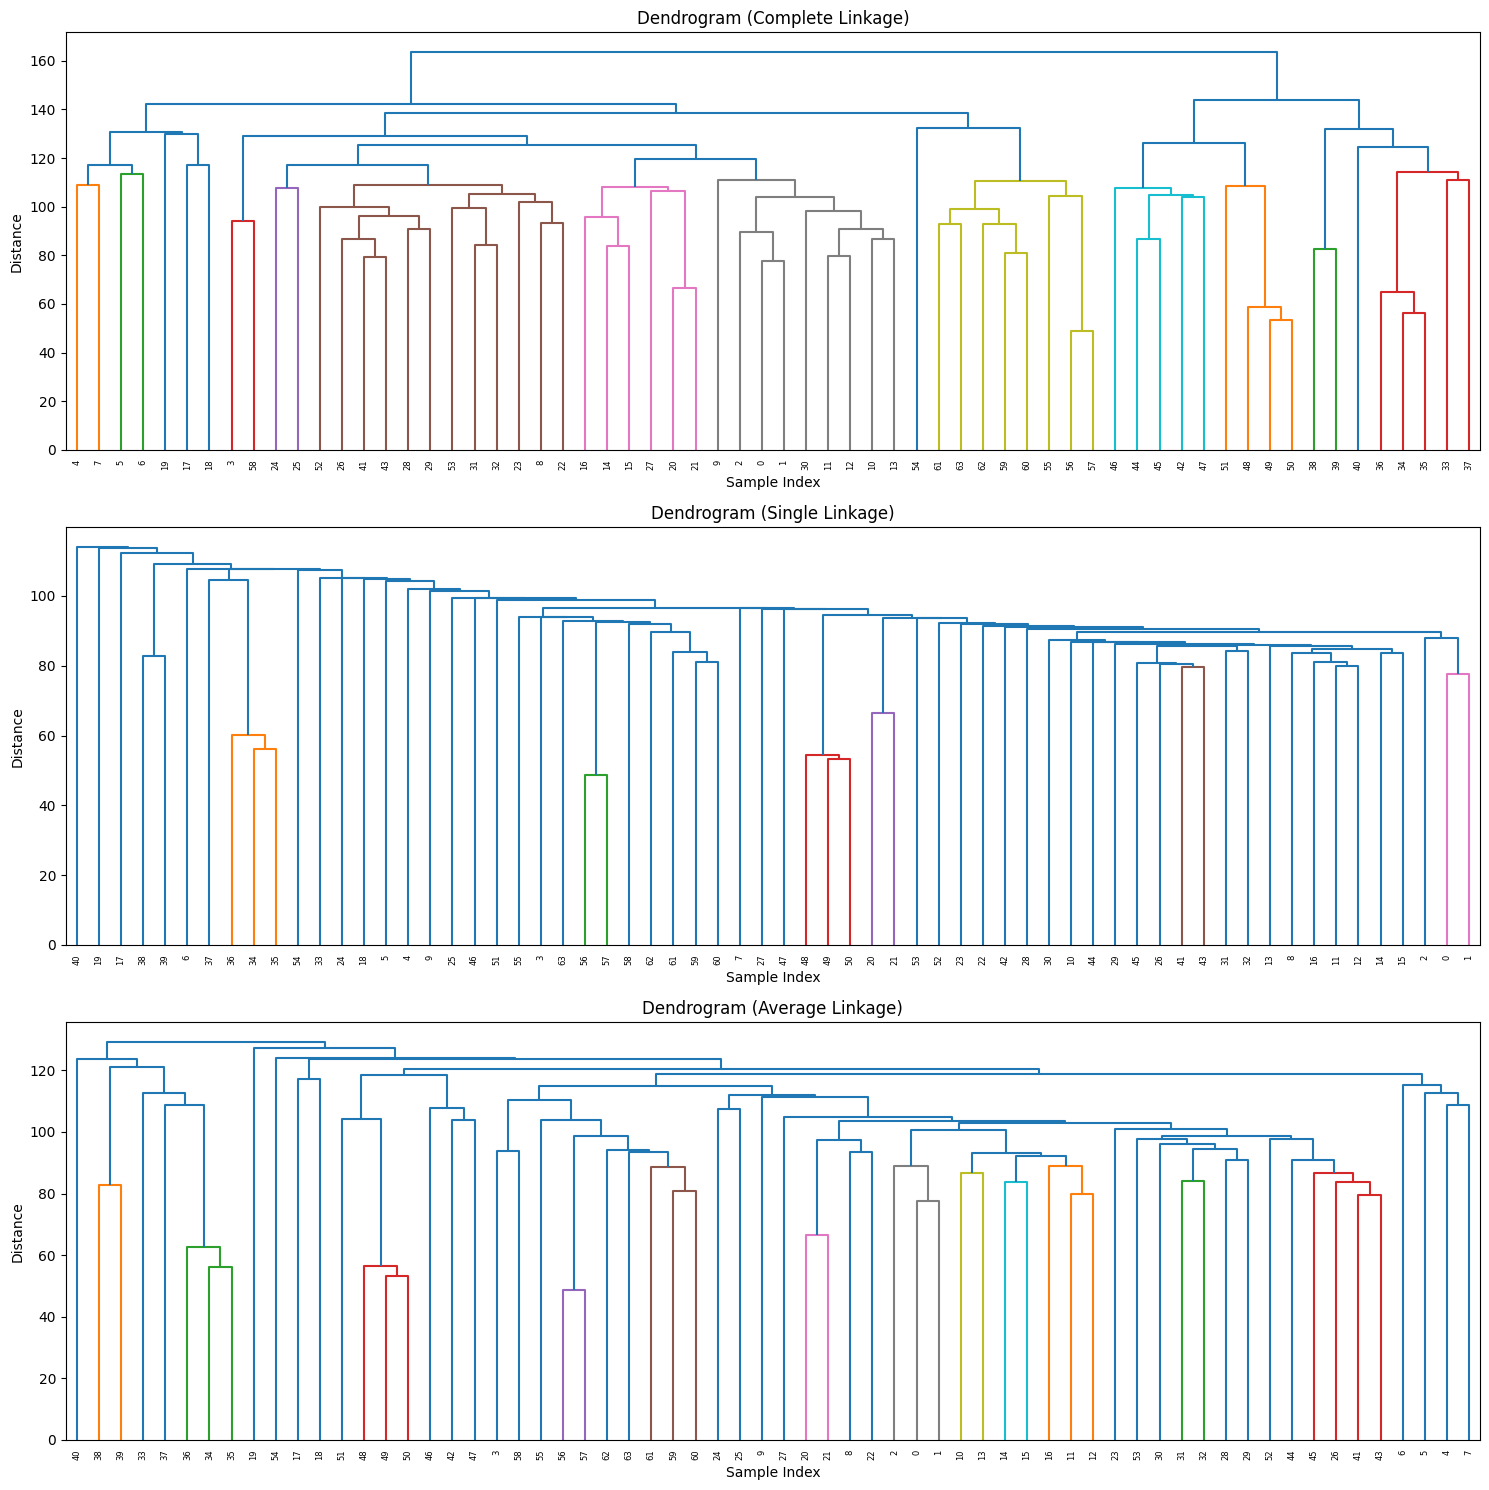

In [109]:
linkage_methods = ['complete', 'single', 'average']

plt.figure(figsize=(15, 5 * len(linkage_methods)))

for i, method in enumerate(linkage_methods):
    linkage_matrix = linkage(X_scaled, method=method)

    plt.subplot(len(linkage_methods), 1, i + 1)
    dendrogram(linkage_matrix)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

In this case once again **Complete** linkage seems to have outperformed the other methods in terms of clustering the cancer types which can be seen by comparing the dendrogram to the *y.value_counts()*.

b) Select a linkage and a number of clusters (by examining the dendrogram and jumps in the heights of the clusters merged). Plot the dendogram and color the branches to identify the clusters. Use the option `labels = np.asarray(y_clean), leaf_font_size=10` in `hierarchy.dendrogram` to add the cancer types as labels for each data point. Do you observe any patterns between the clusters and cancer types?

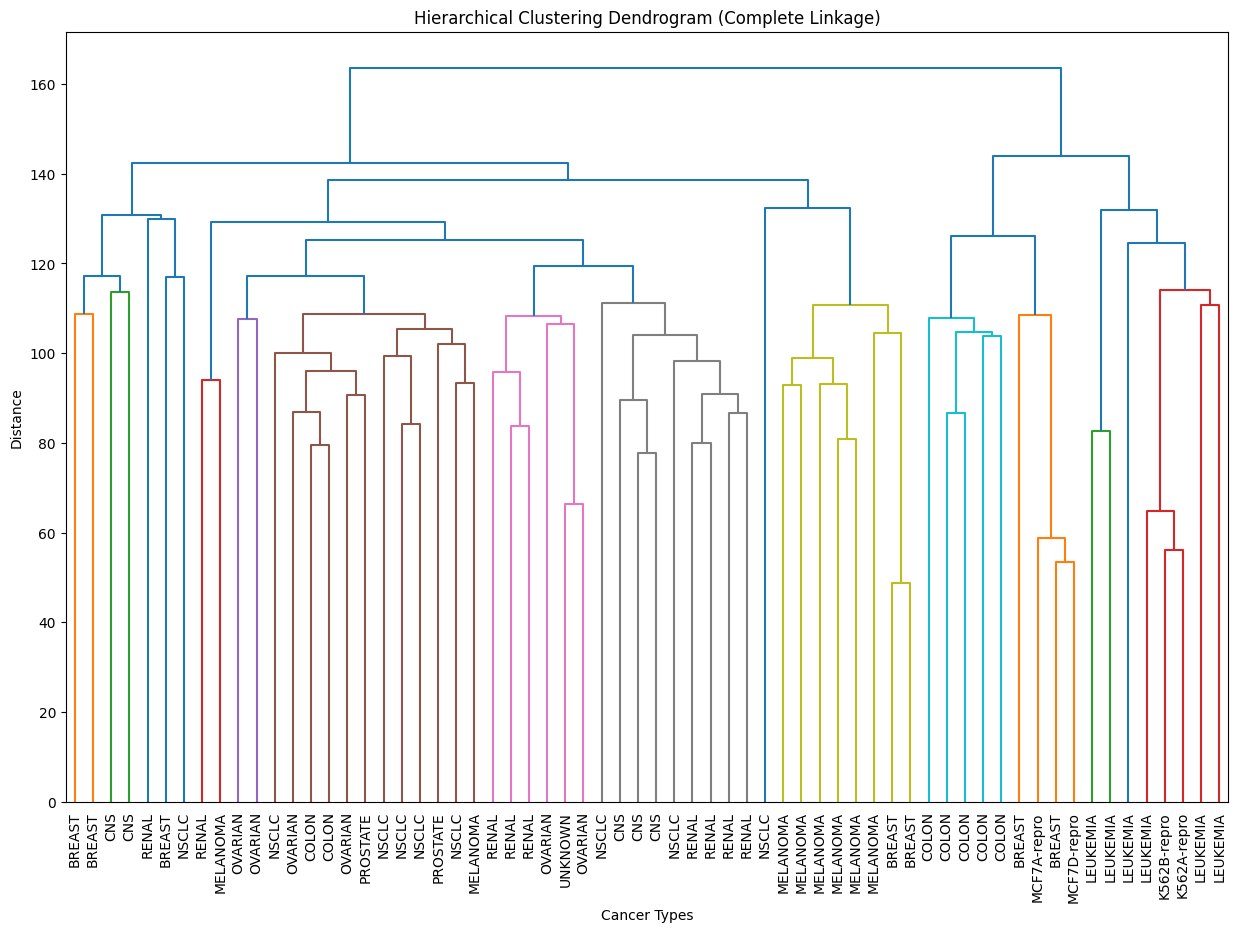

In [110]:
from scipy.cluster.hierarchy import fcluster

linkage_matrix = linkage(X_scaled, method='complete')
hierarchical_labels = fcluster(linkage_matrix, t=11, criterion='maxclust')

plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix,
           labels=np.asarray(y_clean),
           leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Cancer Types')
plt.ylabel('Distance')
plt.show()

There seems to be low correlation between the clusters and cancer types to meaningfully use Hierarchical Clustering for this data. However it is apparent the number of clusters should be $K = 11$.

🏁 **Now, is a good point to switch driver and navigator**

# K-means Clustering: Gene Expression Data <a id='kmeans_genedata'></a>

Now, let's perform k-means clustering on the gene expression data.

### 🚩 Exercise 11 (CORE)

Perform K-means clustering with the same number of clusters that you selected for hierarchical clustering. Are the results similar?

In [111]:
n_clusters = 11

kmeans = KMeans(n_clusters=n_clusters, n_init="auto", random_state=2)
kmeans_labels = kmeans.fit_predict(X_scaled)

kmeans_cancer_mapping = {i: [] for i in range(n_clusters)}
for label, cancer_type in zip(kmeans_labels, y_clean):
    kmeans_cancer_mapping[label].append(cancer_type)

for cluster, types in kmeans_cancer_mapping.items():
    print(f"Cluster {cluster}: {types}")

Cluster 0: ['OVARIAN']
Cluster 1: ['CNS', 'CNS', 'CNS', 'CNS', 'NSCLC', 'RENAL', 'MELANOMA', 'PROSTATE', 'NSCLC', 'NSCLC', 'NSCLC', 'NSCLC']
Cluster 2: ['CNS', 'NSCLC', 'RENAL', 'RENAL', 'RENAL', 'RENAL', 'RENAL', 'RENAL', 'NSCLC', 'OVARIAN']
Cluster 3: ['PROSTATE', 'OVARIAN', 'OVARIAN', 'OVARIAN', 'LEUKEMIA', 'COLON', 'COLON', 'COLON', 'COLON', 'COLON', 'COLON', 'COLON', 'NSCLC', 'NSCLC']
Cluster 4: ['K562B-repro', 'K562A-repro', 'LEUKEMIA']
Cluster 5: ['MELANOMA', 'BREAST', 'BREAST', 'MELANOMA', 'MELANOMA', 'MELANOMA', 'MELANOMA', 'MELANOMA']
Cluster 6: ['RENAL', 'BREAST', 'MELANOMA']
Cluster 7: ['LEUKEMIA', 'LEUKEMIA', 'LEUKEMIA']
Cluster 8: ['BREAST', 'BREAST', 'RENAL', 'UNKNOWN', 'OVARIAN']
Cluster 9: ['LEUKEMIA']
Cluster 10: ['MCF7A-repro', 'BREAST', 'MCF7D-repro', 'BREAST']


### 🚩 Exercise 13 (EXTRA)

Plot the two clustering solutions along with a plot of the data colored by the cancer types in the space spanned by the first two principal components.

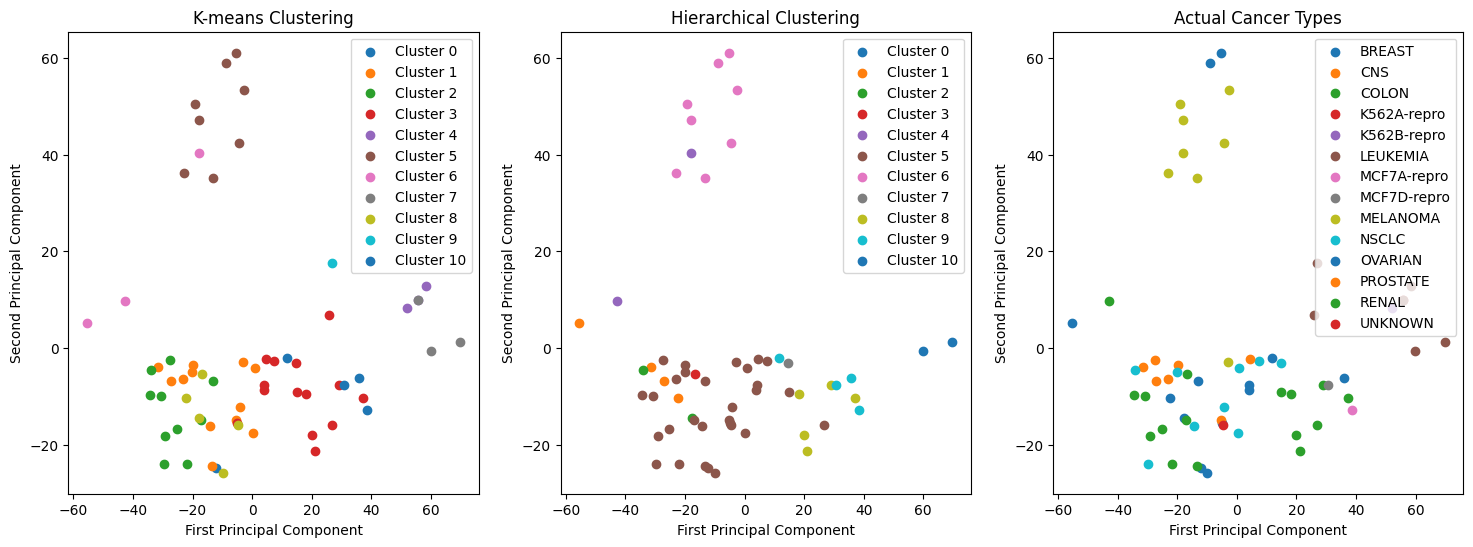

In [112]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
for i in range(n_clusters):
    plt.scatter(X_pca[kmeans_labels == i, 0], X_pca[kmeans_labels == i, 1], label=f'Cluster {i}')
plt.title('K-means Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

plt.subplot(1, 3, 2)
for i in range(n_clusters):
    plt.scatter(X_pca[hierarchical_labels == i, 0], X_pca[hierarchical_labels == i, 1], label=f'Cluster {i}')
plt.title('Hierarchical Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

plt.subplot(1, 3, 3)
for i, cancer_type in enumerate(np.unique(y_clean)):
    plt.scatter(X_pca[y_clean == cancer_type, 0], X_pca[y_clean == cancer_type, 1], label=cancer_type)
plt.title('Actual Cancer Types')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

plt.show()

# Competing the Worksheet

At this point you have hopefully been able to complete all the CORE exercises and attempted the EXTRA ones. Now 
is a good time to check the reproducibility of this document by restarting the notebook's
kernel and rerunning all cells in order.

Before generating the PDF, please go to Edit -> Edit Notebook Metadata and change 'Student 1' and 'Student 2' in the **name** attribute to include your name.

Once that is done and you are happy with everything, you can then run the following cell 
to generate your PDF.

In [113]:
!jupyter nbconvert --to pdf mlp_week03.ipynb 

[NbConvertApp] Converting notebook mlp_week03.ipynb to pdf
[NbConvertApp] Support files will be in mlp_week03_files/
[NbConvertApp] Making directory ./mlp_week03_files
[NbConvertApp] Writing 93516 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1644759 bytes to mlp_week03.pdf
